# Business task

To build an effective machine learning model to classify obesity based on the features and observations in the dataset.

# Load necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report

# Load the dataset

In [2]:
df = pd.read_csv('Downloads\\Obesity Classification.csv')

# Overview and Statistical summary of dataset

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,108.0,NaN,NaN,NaN,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,NaN,NaN,NaN,46.555556,24.72062,11.0,27.0,42.5,59.25,112.0
Gender,108,2,Male,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,108.0,NaN,NaN,NaN,166.574074,27.873615,120.0,140.0,175.0,190.0,210.0
Weight,108.0,NaN,NaN,NaN,59.490741,28.856233,10.0,35.0,55.0,85.0,120.0
BMI,108.0,NaN,NaN,NaN,20.549074,7.583818,3.9,16.7,21.2,26.1,37.2
Label,108,4,Underweight,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [6]:
# checking for null values
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

There are no null values in the dataset.

In [7]:
# dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [8]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


# EDA

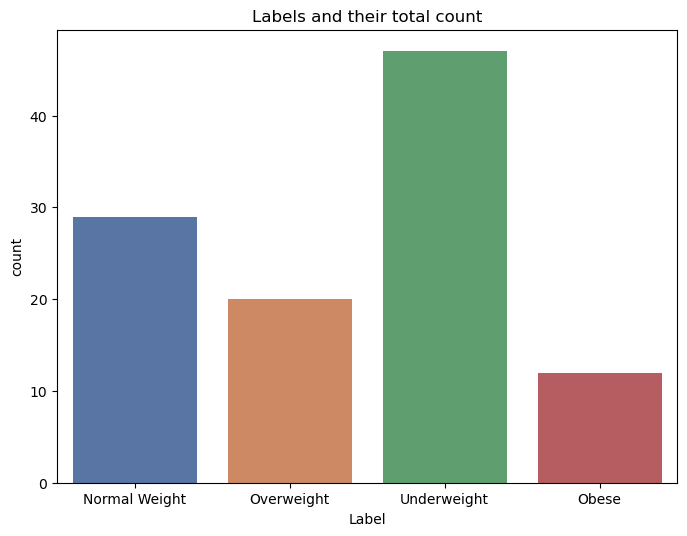

In [13]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df,x='Label',palette='deep')
plt.title('Labels and their total count');

Highest number of observations are labelled underweight and least number are Obese.

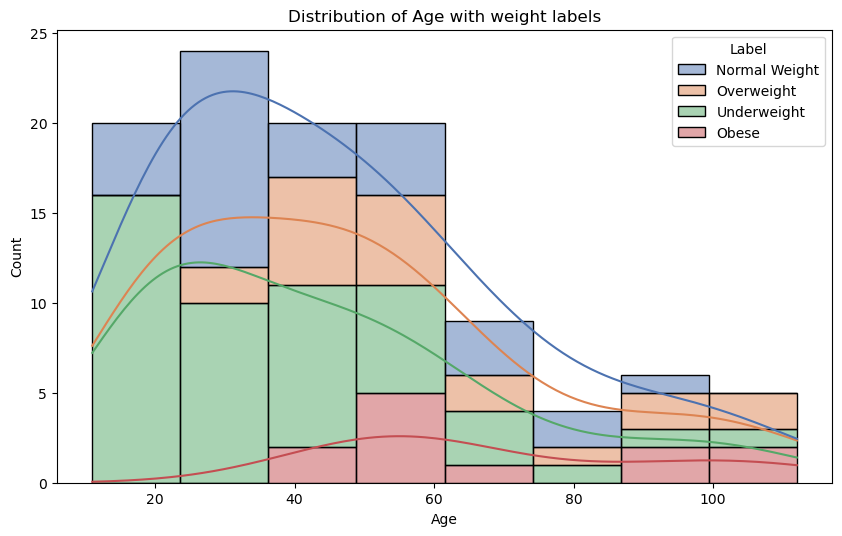

In [15]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Age',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Age with weight labels');

All obese people are aged 40 and above.

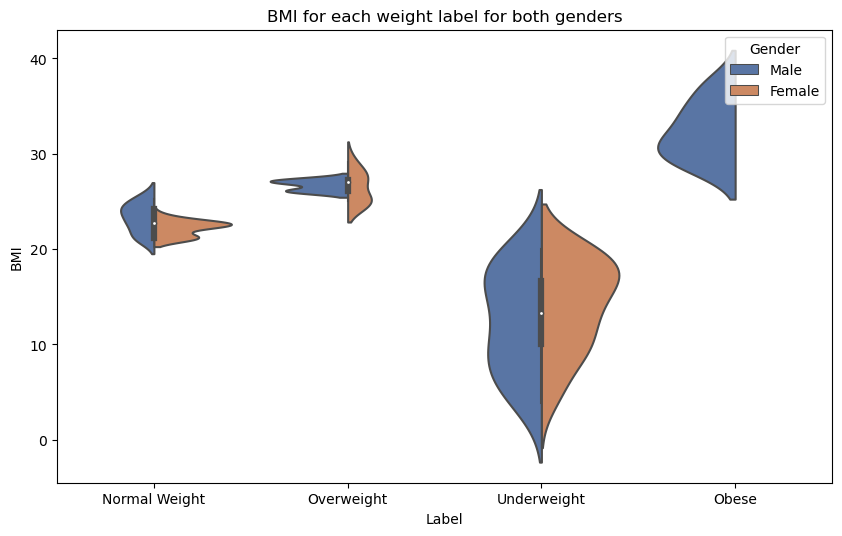

In [18]:
plt.figure(figsize=(10,6),dpi=100)
sns.violinplot(data=df,x='Label',y='BMI',hue='Gender',split=True,palette='deep')
plt.title('BMI for each weight label for both genders');

* There are no obese females.
* Median BMI for normal and overweight fall between 20 and 30.
* Median BMI for underweight is below 20.
* Obese weight BMI fall above 30.


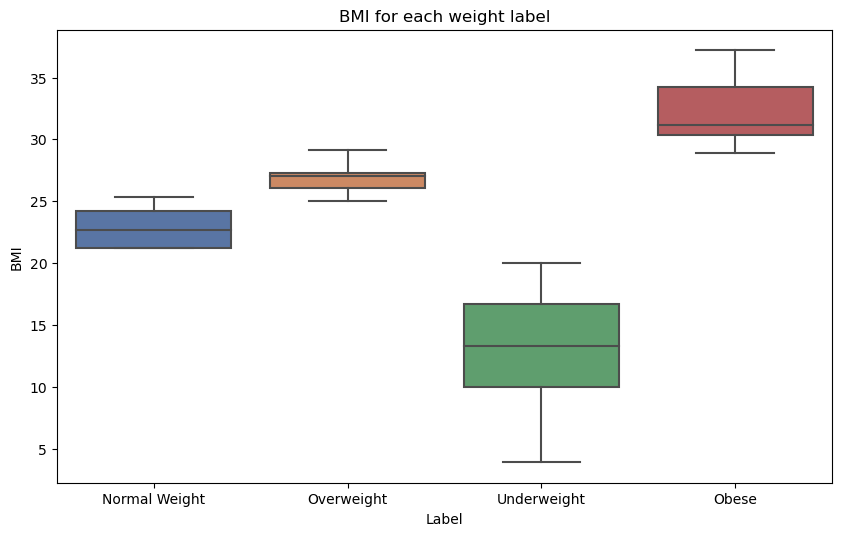

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=df,x='Label',y='BMI',palette='deep')
plt.title('BMI for each weight label');

There are no outliers in the dataset.

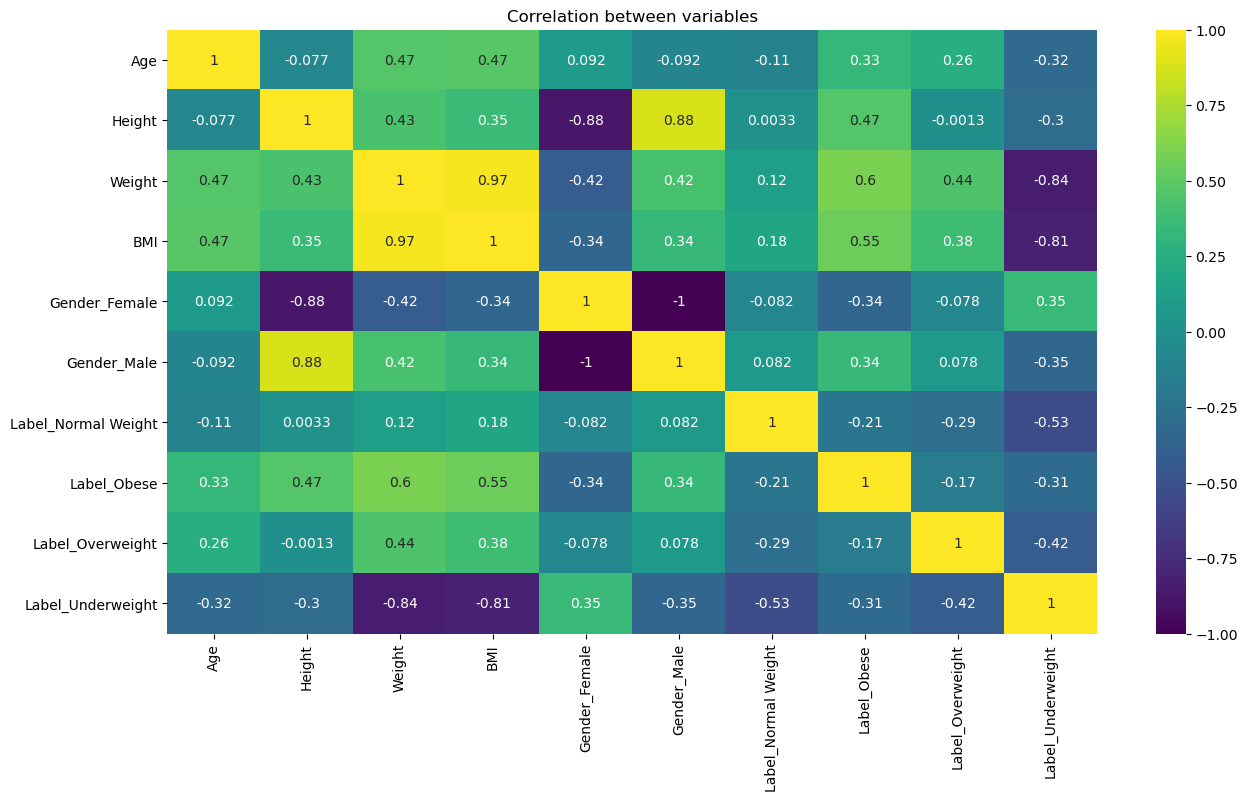

In [22]:
plt.figure(figsize=(15,8),dpi=100)
sns.heatmap(pd.get_dummies(df).corr(),cmap='viridis',annot=True)
plt.title('Correlation between variables');

# Model building

# Random forest classifier

In [24]:
# creating X,y
X = pd.get_dummies(df.drop(['Label'],axis=1),drop_first=True)
y = df['Label']

In [25]:
# Choosing 15%  as test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [26]:
# instantiating standard scaler
scale = StandardScaler()

In [27]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [28]:
r_model = RandomForestClassifier()

In [29]:
r_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [31]:
y_pred = r_model.predict(X_test_scaled)

# Evaluating the model

In [30]:
r_model.score(X_test_scaled,y_test)

1.0

Random forest model has scored 100% on test data.

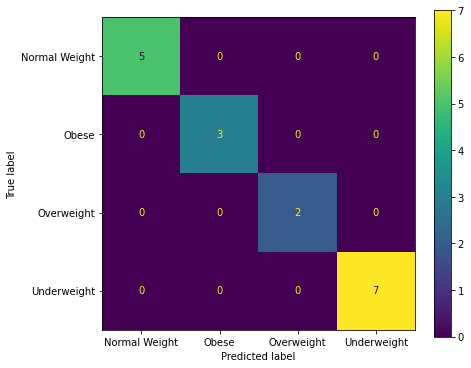

In [41]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(r_model,X_test_scaled,y_test,ax=ax);

There are no misclassified labels from the above.

In [42]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         5
        Obese       1.00      1.00      1.00         3
   Overweight       1.00      1.00      1.00         2
  Underweight       1.00      1.00      1.00         7

     accuracy                           1.00        17
    macro avg       1.00      1.00      1.00        17
 weighted avg       1.00      1.00      1.00        17



Model has performed well with 100% accuracy.

**Thank you!**